<a href="https://colab.research.google.com/github/pobeidy1/py_public/blob/main/vol_of_irigular_shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from scipy.spatial import ConvexHull

# Function to generate random points within a sphere
def generate_sphere_points(radius, num_points):
    points = []
    for _ in range(num_points):
        phi = np.random.uniform(0, np.pi)
        theta = np.random.uniform(0, 2 * np.pi)
        r = radius * np.cbrt(np.random.uniform(0, 1))  # Cube root for uniform distribution

        x = r * np.sin(phi) * np.cos(theta)
        y = r * np.sin(phi) * np.sin(theta)
        z = r * np.cos(phi)

        points.append([x, y, z])
    return np.array(points)

# Generate a set of points within a sphere of radius 3
points = generate_sphere_points(radius=3, num_points=1000)

# Calculate the Convex Hull
hull = ConvexHull(points)

# The volume is an attribute of the Convex Hull object
volume = hull.volume
print('Volume of the irregular shape is:', volume)


Volume of the irregular shape is: 96.52201891679888


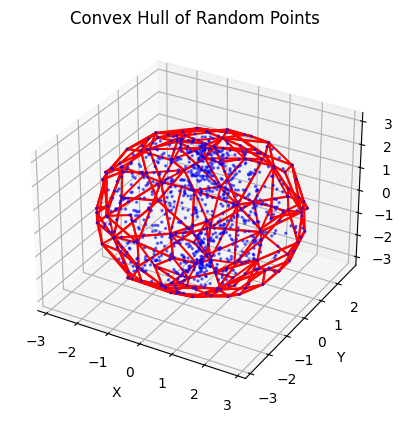

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=2, c='b', alpha=0.5)

# Plot the convex hull
for simplex in hull.simplices:
    vertices = points[simplex]
    ax.plot(vertices[:, 0], vertices[:, 1], vertices[:, 2], 'r-')

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Convex Hull of Random Points')

# Show the plot
plt.show()


In [3]:
!pip install SimpleITK
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.9 MB/s eta 0:00:00


In [11]:
import SimpleITK as sitk
import os

# Step 1: Load CT images
def load_ct_images(directory):
    reader = sitk.ImageSeriesReader()

    # Attempt to get series file names
    dicom_files = reader.GetGDCMSeriesFileNames(directory)

    if not dicom_files:
        # Manually list and add files if automatic detection fails
        dicom_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.dcm')]
        if not dicom_files:
            raise ValueError("No DICOM files found in the directory.")

    reader.SetFileNames(dicom_files)
    ct_images = reader.Execute()
    return ct_images

# Step 2: Segment regions of interest
def segment_organ(ct_images):
    # Implement segmentation algorithm or perform manual segmentation
    segmented_images = ...  # Segmented organ images
    return segmented_images

# Step 3: Determine voxel size
def get_voxel_size(dicom_files):
    first_dicom = pydicom.read_file(dicom_files[0])
    voxel_size = first_dicom.PixelSpacing[0] * first_dicom.PixelSpacing[1] * first_dicom.SliceThickness
    return voxel_size

# Step 4: Calculate volume
def calculate_volume(segmented_images, voxel_size):
    statistics = sitk.StatisticsImageFilter()
    statistics.Execute(segmented_images)
    volume = statistics.GetSum() * voxel_size
    return volume

# Example usage
ct_directory = 'path_to_ct_images_directory'
ct_images = load_ct_images(ct_directory)
segmented_images = segment_organ(ct_images)
dicom_files = [os.path.join(ct_directory, file) for file in os.listdir(ct_directory) if file.endswith('.dcm')]
voxel_size = get_voxel_size(dicom_files)
volume = calculate_volume(segmented_images, voxel_size)
print("Volume:", volume)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_ct_images_directory'

In [8]:
import SimpleITK as sitk
import pydicom
import os

# Step 1: Load CT images
def load_ct_images(directory):
    reader = sitk.ImageSeriesReader()
    dicom_files = reader.GetGDCMSeriesFileNames(directory)
    reader.SetFileNames(dicom_files)
    ct_images = reader.Execute()
    return ct_images

# Step 2: Segment regions of interest
def segment_organ(ct_images):
    # Implement segmentation algorithm or perform manual segmentation
    segmented_images = ...  # Segmented organ images
    return segmented_images

# Step 3: Determine voxel size
def get_voxel_size(dicom_files):
    first_dicom = pydicom.read_file(dicom_files[0])
    voxel_size = first_dicom.PixelSpacing[0] * first_dicom.PixelSpacing[1] * first_dicom.SliceThickness
    return voxel_size

# Step 4: Calculate volume
def calculate_volume(segmented_images, voxel_size):
    statistics = sitk.StatisticsImageFilter()
    statistics.Execute(segmented_images)
    volume = statistics.GetSum() * voxel_size
    return volume

# Example usage
ct_directory = 'path_to_ct_images_directory'
ct_images = load_ct_images(ct_directory)
segmented_images = segment_organ(ct_images)
dicom_files = [os.path.join(ct_directory, file) for file in os.listdir(ct_directory) if file.endswith('.dcm')]
voxel_size = get_voxel_size(dicom_files)
volume = calculate_volume(segmented_images, voxel_size)
print("Volume:", volume)


RuntimeError: Exception thrown in SimpleITK ImageSeriesReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageSeriesReader.cxx:131:
sitk::ERROR: File names information is empty. Cannot read series.